# Training a Food Classifier


## Load and prepare Data

First we need to update the notebook to the latest version of fastai.

In [ ]:
!pip install -Uqq fastai 
from fastai.vision.all import *

At first we are downloading the Food Dataset, containing about 100k images of various kind of foods.
Documentation for all Datasets: https://docs.fast.ai/data.external

In [ ]:
foodPath = untar_data(URLs.FOOD)

In [ ]:
#How many images are we dealing with
len(get_image_files(foodPath))

In [ ]:
#Use Pandas to parse the JSON as a human readable table
pd.read_json('/root/.fastai/data/food-101/test.json')

In [ ]:
#Deciding which two foods we want to classify
labelA = 'samosa'
labelB = 'churros'

**Some Data Preperation**

Next we're gonna do some preperation to make the data handling easier. It's not important that you understand the following code snippet completly.

We're just doing two things:


1.   Removing all images that don't have labelA or labelB
2.   Renaming images with labelA or labelB to have that label in their filename



In [ ]:
#Loop through all Images downloaded
for img in get_image_files(foodPath):    
  #Rename Images so that the Label (Samosa or Churros) is in the file name
  if labelA in str(img):
    img.rename(f"{img.parent}/{labelA}_{img.name}")
  elif labelB in str(img):
    img.rename(f"{img.parent}/{labelB}_{img.name}")
  else: os.remove(img) #If the Images are not part of labelA or labelB

len(get_image_files(foodPath))

## Train Model

In [ ]:
def GetLabel(fileName):
  return fileName.split('_')[0]

GetLabel("churros_734186.jpg") #Testing

In [ ]:
dls = ImageDataLoaders.from_name_func(
    foodPath, get_image_files(foodPath), valid_pct=0.2, seed=420,
    label_func=GetLabel, item_tfms=Resize(224))

dls.valid.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate, pretrained=True)
learn.fine_tune(epochs=1)

Check out this while training to have look inside a Convolutional Neural Network.

https://distill.pub/2017/feature-visualization/

## Verify Model

### Upload your own Images

In [ ]:
from google.colab import files
uploader = files.upload()

for img in uploader.items():
  uploadedImg = img[0]

img = PILImage.create(uploadedImg)
img.show()

label,_,probs = learn.predict(img)

print(f"This is a {label}.")
print(f"{labelA} {probs[1].item():.6f}")
print(f"{labelB} {probs[0].item():.6f}")

### Test using images in dataset

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0,10):
  #Load random image
  randomIndex = random.randint(0, len(get_image_files(foodPath))-1)
  img = mpimg.imread(get_image_files(foodPath)[randomIndex])
  #Put into Model
  label,_,probs = learn.predict(img)

  #Create Figure using Matplotlib
  fig = plt.figure()
  ax = fig.add_subplot() #Add Subplot (For multiple images)
  imgplot = plt.imshow(img) #Add Image into Plot
  ax.set_title(label) #Set Headline to predicted label

  #Hide numbers on axes
  plt.gca().axes.get_yaxis().set_visible(False)
  plt.gca().axes.get_xaxis().set_visible(False)

### Confusion Matrix (optional)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(6)

## Deploy

In [ ]:
learn.export() #exports model as 'export.pkl' by default

In [ ]:
#let's grab the first pkl file we can find
modelPath = get_files(foodPath, '.pkl')[0]
modelPath

In [ ]:
learn_inf = load_learner(modelPath)
learn_inf.predict(mpimg.imread(get_image_files(foodPath)[0])) #raw prediction

In [ ]:
learn_inf.dls.vocab #Get the labels

In [ ]:
#This seems to only work properly in Chrome
from google.colab import files
files.download(modelPath)

### Alternative download method
Download for non-chrome users only:

In [ ]:
shutil.move(str(modelPath), './')

This has moved the file. You should now be able to see it in the Colab File browser on the right and download it there. 

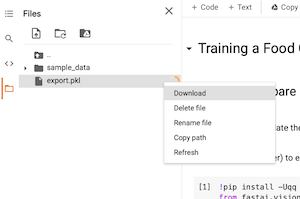